<a href="https://colab.research.google.com/github/lompas10/MathStat_course_from_MIREA/blob/main/5/stats_PR5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson

In [156]:
data_1 = pd.read_csv('1.txt', header=None)
data_1.columns = ['X']
data_1.head()

,X
0,1.844286
1,-0.419151
2,-2.618397
3,-3.158736
4,-2.728708


In [157]:
data_2 = pd.read_csv('2.txt', header=None)
data_2.columns = ['X']
data_2.head()

,X
0,5.573160
1,4.026853
2,5.405676
3,3.874130
4,1.109944


In [158]:
def ljung(x, lags):
  x = pd.Series(x)
  autocorrs = [] 
  for i in range(1, lags+1):
    autocorrs.append(x.autocorr(i) ** 2 / (len(x) - i))
  print(autocorrs)
  return len(x) * (len(x) + 2) * np.sum(autocorrs)

In [159]:
def SMA(x, windows):
  x = x.X
  average = []
  stats = {}
  for window in windows:
    average = []
    for i in range(window, len(x)+window):
      average.append(x[i-window:i+1].mean())
    residuals = x - average
    stats[window] = acorr_ljungbox(residuals, lags=[5])[0]
  min_value = min(stats.values())
  min_keys = [k for k in stats if stats[k] == min_value]
  average = []
  for i in range(min_keys[0], len(x)+min_keys[0]):
      average.append(x[i-min_keys[0]:i+1].mean())
  durbin = durbin_watson(x - average)
  plt.plot(x)
  plt.plot(pd.Series(average))
  return {min_keys[0] : min_value}, durbin

Оптимальное значение размера окна для файла 1: 9
Q-статистика Льюинга-Бокса: [97.22566099]
Статистика Дарбина-Уотсона : 0.8108699025471197
Оптимальное значение размера окна для файла 2: 5
Q-статистика Льюинга-Бокса: [4.63813124]
Статистика Дарбина-Уотсона : 2.036987145038523


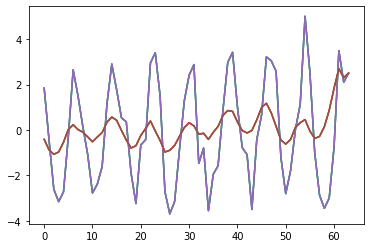

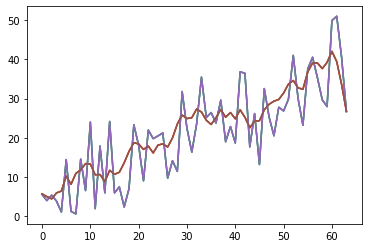

<Figure size 432x288 with 0 Axes>

In [160]:
windows = [3, 5, 7, 9]
datas = [data_1, data_2]
iterator = 0
for data in datas:
  print(f'Оптимальное значение размера окна для файла {iterator + 1}: {list(SMA(data, windows)[0].keys())[0]}\nQ-статистика Льюинга-Бокса: {list(SMA(data, windows)[0].values())[0]}\nСтатистика Дарбина-Уотсона : {SMA(data, windows)[1]}')
  plt.figure()
  iterator += 1

In [161]:
weights = [0.1, 0.15, 0.2, 0.25, 0.3]
sum_weights = sum(weights)
weighted_average = data_1.X.rolling(window=5, center=True).apply(lambda x: np.sum(weights*x)/sum_weights, raw=False)


In [162]:
def WMA(x, windows):
  x = x.X
  average = []
  stats = {}
  for window in windows:
    weights = [np.random.rand() for _ in range(window)]
    sum_weights = sum(weights)
    average = x.rolling(window=window, center=True).apply(lambda x: np.sum(weights*x)/sum_weights, raw=False).fillna(0.5)
    residuals = x - average
    stats[window] = acorr_ljungbox(residuals, lags=[5])[0]
  min_value = min(stats.values())
  min_keys = [k for k in stats if stats[k] == min_value]
  average = []
  for i in range(min_keys[0], len(x)+min_keys[0]):
      average.append(x[i-min_keys[0]:i+1].mean())
  durbin = durbin_watson(x - average)
  plt.plot(x)
  plt.plot(pd.Series(average))
  return {min_keys[0] : min_value}, durbin

Оптимальное значение размера окна для файла 1: 3
Q-статистика Льюинга-Бокса: [19.53537253]
Статистика Дарбина-Уотсона : 0.7820029343008794
Оптимальное значение размера окна для файла 2: 5
Q-статистика Льюинга-Бокса: [5.90198403]
Статистика Дарбина-Уотсона : 2.036987145038523


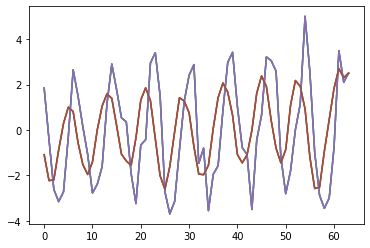

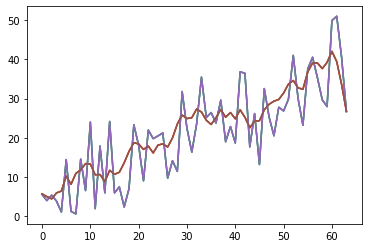

<Figure size 432x288 with 0 Axes>

In [163]:
windows = [3, 5, 7, 9]
datas = [data_1, data_2]
iterator = 0
for data in datas:
  print(f'Оптимальное значение размера окна для файла {iterator + 1}: {list(WMA(data, windows)[0].keys())[0]}\nQ-статистика Льюинга-Бокса: {list(WMA(data, windows)[0].values())[0]}\nСтатистика Дарбина-Уотсона : {WMA(data, windows)[1]}')
  plt.figure()
  iterator += 1

In [164]:
def EMA(x, alphas):
  x = x.X
  stats = {}
  for alpha in alphas:
    average = []
    average.append(x[0])
    for i in range(1, len(x)):
      average.append(alpha * x[i] + (1 - alpha) * average[i-1])
    residuals = x - average
    stats[alpha] = acorr_ljungbox(residuals, lags=[5])[0]
  min_value = min(stats.values())
  min_keys = [k for k in stats if stats[k] == min_value]
  average_opt = []
  average_opt.append(x[0])
  for i in range(1, len(x)):
    average_opt.append(alpha * x[i] + (1 - alpha) * average_opt[i-1])
  durbin = durbin_watson(x - average_opt)
  plt.plot(x)
  plt.plot(pd.Series(average_opt))
  return {min_keys[0] : min_value}, durbin

Оптимальное значение параметра сглаживания для файла 1: 0.8
Q-статистика Льюинга-Бокса: [array([79.48751305])]
Критерий дарбина-Уотсона: 1.1820487501061736
Оптимальное значение параметра сглаживания для файла 2: 0.1
Q-статистика Льюинга-Бокса: [array([7.65913165])]
Критерий дарбина-Уотсона: 2.6613242558895136


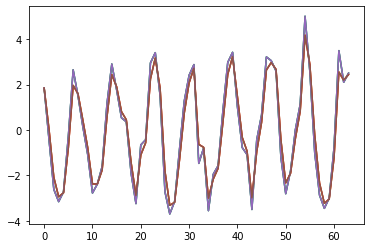

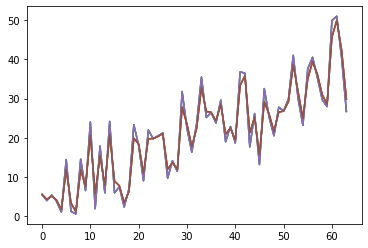

<Figure size 432x288 with 0 Axes>

In [165]:
alphas = list(np.arange(0.1, 0.9, 0.1))
datas = [data_1, data_2]
iterator = 0
for data in datas:
  print(f'Оптимальное значение параметра сглаживания для файла {iterator + 1}: {list(EMA(data, alphas)[0].keys())[0]}\nQ-статистика Льюинга-Бокса: {list(EMA(data, alphas)[0].values())}\nКритерий дарбина-Уотсона: {EMA(data, alphas)[1]}')
  plt.figure()
  iterator += 1

In [166]:
def DEMA(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [167]:
alphas = list(np.arange(0.1, 0.9, 0.1))
betas = alphas

In [168]:
stats = {}
for data in datas:
  for alpha in alphas:
    for beta in betas:
      stats[alpha, beta] = acorr_ljungbox(data.X - DEMA(data.X, alpha, beta), lags=[5])[0]

Оптимальные параметры для DEMA: alpha : 0.2, beta : 0.7000000000000001
Q-статистика: [83.94136122]
Дарбин-Уотсон: 0.5762598349927073
Оптимальные параметры для DEMA: alpha : 0.2, beta : 0.7000000000000001
Q-статистика: [5.13276062]
Дарбин-Уотсон: 1.8108960230681057


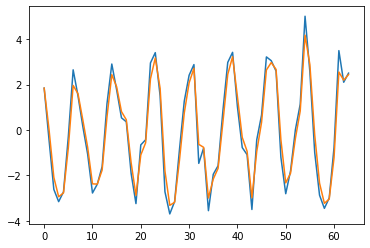

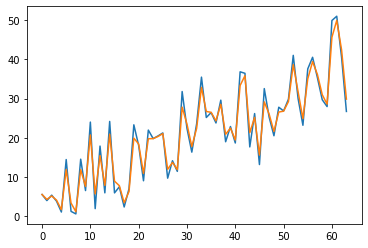

<Figure size 432x288 with 0 Axes>

In [169]:
for data in datas:
  x = data.X
  min_value = min(stats.values())
  min_keys = [k for k in stats if stats[k] == min_value]
  average_opt = []
  average_opt.append(x[0])
  for i in range(1, len(x)):
    average_opt.append(alpha * x[i] + (1 - alpha) * average_opt[i-1])
  plt.plot(x)
  plt.plot(pd.Series(average_opt))
  plt.figure()
  print(f'Оптимальные параметры для DEMA: alpha : {min_keys[0][0]}, beta : {min_keys[0][1]}\nQ-статистика: {acorr_ljungbox(data.X - DEMA(data.X, min_keys[0][0], min_keys[0][1]), lags=[5])[0]}\nДарбин-Уотсон: {durbin_watson(data.X - DEMA(data.X, min_keys[0][0], min_keys[0][1]))}')